# 課題6: ディープラーニングのモデルを構築しよう

今回の課題では手書き数字の認識を、CNNを用いて行います。ただし本課題では、レッスン本編で用いたscikit-learnのものではなく、Kerasのデータセットに含まれている、より大きいサイズの手書き数字データで課題を進めていただきます。

下記にKerasから手書き数字のデータセットをダウンロードするコードが記載されています。このデータを用いてディープラーニングのモデルを構築してください。

今までのレッスンで学んだ内容を踏まえ、各セルにコードを埋めていってください。

（※`変更しないでください`と書かれたセルには、コードの追記変更をしないでください）

## 1. ライブラリのimport

In [1]:
# （変更しないでください）

# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TensorFlow
import tensorflow as tf

# データの分割
from sklearn.model_selection import train_test_split

# DataFrameですべての列を表示する設定
pd.options.display.max_columns = None

## 2. データの読み込み

Kerasのデータセットは、あらかじめTraining setとTest setに分けられています。戻り値はタプルで取得できます。

In [2]:
# Kerasに添付されている手書き数字のデータセットをダウンロードして読み込む
# （変更しないでください）
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

## 3. データの確認

In [3]:
# X_train, Y_train, X_test, Y_testの形状を確認
# X_train, Y_train, X_test, Y_testの形状を確認
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape :", X_test.shape)
print("Y_test shape :", Y_test.shape)


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape : (10000, 28, 28)
Y_test shape : (10000,)


In [4]:
# X_trainの先頭1行を表示
# dataから1枚の画像データを取得
# X_trainの先頭1行を表示
# dataから1枚の画像データを取得
temp = X_train[0]
temp


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
# Y_trainの先頭1行を表示
# dataから1枚の画像データを取得
label = Y_train[0]
label




np.uint8(5)

データセットを可視化して表示します。

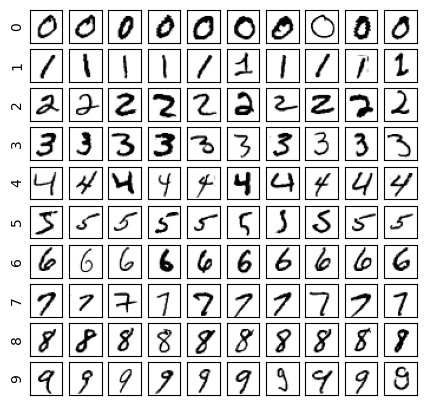

In [6]:
# （変更しないでください）

# 「数字:空のリスト」の辞書を作成する
images = {label: [] for label in range(0,10)}

# 総イメージ数
image_count = 0

# それぞれの数字のリストに、説明変数をappendしていく
for i in range(0, len(X_train)):
    if len(images[Y_train[i]]) < 10:
        images[Y_train[i]].append(X_train[i])
        image_count += 1
        if image_count == 100:
            break

# 10行10列にグラフを分割
fig, ax = plt.subplots(10, 10, figsize=(5, 5))

for i in range(10):
    # ラベル
    ax[i, 0].set_ylabel(i)

    for j in range(10):
        # 行=i、列=jの位置に画像を描画する
        ax[i, j].imshow(images[i][j].reshape(28, 28), cmap='Greys')

        # 目盛を表示しない設定
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()

## 4. データの前処理

In [7]:
# len関数を使い、X_trainを(X_trainの長さ, 28, 28, 1)にreshapeしてX_train2に代入

X_train2 = X_train.reshape(len(X_train), 28, 28, 1)

# len関数を使い、X_testを(X_testの長さ, 28, 28, 1)にreshapeしてX_test2に代入
X_test2 = X_test.reshape(len(X_test), 28, 28, 1)

In [8]:
# to_categoricalを使い、Y_trainをカテゴリー変数に展開してY_train2に代入

Y_train2 = tf.keras.utils.to_categorical(Y_train)
# to_categoricalを使い、Y_testをカテゴリー変数に展開してY_test2に代入
Y_test2 = tf.keras.utils.to_categorical(Y_test)

In [9]:
# X_train2, Y_train2, X_test2, Y_test2の形状を確認
print("X_train2 shape:", X_train2.shape)
print("Y_train2 shape:", Y_train2.shape)
print("X_test2 shape :", X_test2.shape)
print("Y_test2 shape :", Y_test2.shape)

X_train2 shape: (60000, 28, 28, 1)
Y_train2 shape: (60000, 10)
X_test2 shape : (10000, 28, 28, 1)
Y_test2 shape : (10000, 10)


In [10]:
# train_test_splitを使い、学習データと検証データに7:3（検証データが3割）で分割する
# （詳細：データ(X_train2、Y_train2)を「X_train2, X_valid2, Y_train2, Y_valid2」に分割）

X_train2, X_valid2, Y_train2, Y_valid2 = train_test_split(X_train2, Y_train2, test_size=0.3, random_state=0)

In [11]:
# X_train2, Y_train2, X_valid2, Y_valid2, X_test2, Y_test2の形状を確認
# X_train2, Y_train2, X_valid2, Y_valid2, X_test2, Y_test2の形状を確認
print("X_train2 shape:", X_train2.shape)
print("Y_train2 shape:", Y_train2.shape)

print("X_valid2 shape:", X_valid2.shape)
print("Y_valid2 shape:", Y_valid2.shape)

print("X_test2 shape :", X_test2.shape)
print("Y_test2 shape :", Y_test2.shape)


X_train2 shape: (42000, 28, 28, 1)
Y_train2 shape: (42000, 10)
X_valid2 shape: (18000, 28, 28, 1)
Y_valid2 shape: (18000, 10)
X_test2 shape : (10000, 28, 28, 1)
Y_test2 shape : (10000, 10)


## 5. モデルの構築

Kerasを使ってモデルを構築してみましょう。以下を条件とします：

- CNN(Conv2D)を使うこと
- 正解率(accuracy)が50%以上であること

場合によっては、学習にものすごく時間がかかる場合もあります。適宜、パラメータ数を調整して行なってください。

In [12]:
# （モデルの初期化から構築までのコードを、このセル以下に記述してください）

# --- モデルの初期化 ---
model = tf.keras.Sequential([
    # 入力層（MNIST: 28x28の白黒画像）
    tf.keras.layers.Input(shape=(28, 28, 1)),

    # 畳み込み層（フィルター数を32〜64程度に調整）
    tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # 平坦化
    tf.keras.layers.Flatten(),

    # 全結合
    tf.keras.layers.Dense(32, activation="relu"),

    # Dropout（過学習防止・計算量も抑えやすい）
    tf.keras.layers.Dropout(0.2),

    # 出力層（10クラス）
    tf.keras.layers.Dense(10, activation="softmax"),
])

# --- モデルの構築（compile）---
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)



print("fit done")


fit done


In [13]:
# テストデータで最終評価（accuracy確認）
test_loss, test_acc = model.evaluate(X_test2, Y_test2, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)


Test loss: 62.52751159667969
Test accuracy: 0.05380000174045563


In [14]:
# モデルの構造を表示
# モデルの構造を表示
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,762 (120.16 KB)

 Trainable params: 30,762 (120.16 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:


# 学習の実施（ものすごく時間がかかる場合もあります）

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
    verbose=1
)
log = model.fit(
    X_train2, Y_train2,
    validation_data=(X_valid2, Y_valid2),
    epochs=20,
    batch_size=256,
    verbose=2

)



Epoch 1/20
165/165 - 2s - 14ms/step - accuracy: 0.3459 - loss: 2.5135 - val_accuracy: 0.7121 - val_loss: 0.9416
Epoch 2/20
165/165 - 2s - 11ms/step - accuracy: 0.7807 - loss: 0.6859 - val_accuracy: 0.9227 - val_loss: 0.3204
Epoch 3/20
165/165 - 2s - 10ms/step - accuracy: 0.8928 - loss: 0.3526 - val_accuracy: 0.9594 - val_loss: 0.1583
Epoch 4/20
165/165 - 2s - 10ms/step - accuracy: 0.9299 - loss: 0.2312 - val_accuracy: 0.9699 - val_loss: 0.1142
Epoch 5/20
165/165 - 2s - 10ms/step - accuracy: 0.9475 - loss: 0.1742 - val_accuracy: 0.9785 - val_loss: 0.0793
Epoch 6/20
165/165 - 2s - 10ms/step - accuracy: 0.9562 - loss: 0.1405 - val_accuracy: 0.9809 - val_loss: 0.0743
Epoch 7/20
165/165 - 2s - 11ms/step - accuracy: 0.9631 - loss: 0.1208 - val_accuracy: 0.9791 - val_loss: 0.0841
Epoch 8/20
165/165 - 2s - 10ms/step - accuracy: 0.9679 - loss: 0.1092 - val_accuracy: 0.9827 - val_loss: 0.0630
Epoch 9/20
165/165 - 2s - 10ms/step - accuracy: 0.9708 - loss: 0.0949 - val_accuracy: 0.9810 - val_loss:

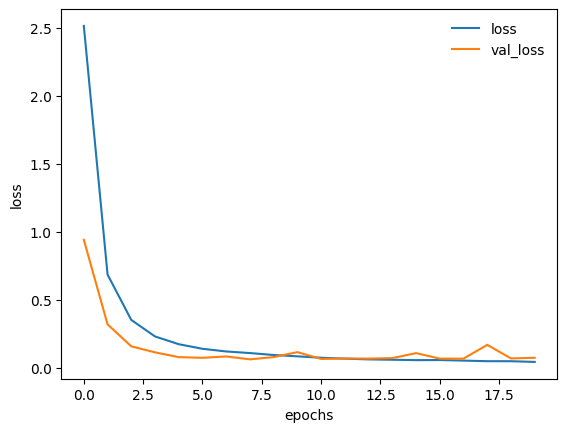

In [20]:
# 学習過程をグラフ表示
# 学習過程をグラフ表示（loss）

plt.plot(log.history["loss"], label="loss")
plt.plot(log.history["val_loss"], label="val_loss")
plt.legend(frameon=False)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()


In [21]:
# predictを使い、X_test2をもとに予測した結果を、
# カテゴリー変数へ復元してY_pred2に代入

Y_pred_prob = model.predict(X_test2)
Y_pred2 = np.argmax(Y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [22]:
# Y_test2もカテゴリー変数へ復元して、Y_test2_ に代入
Y_test2_ = np.argmax(Y_test2, axis=1)

In [23]:
# classification_reportを使い、モデルの評価を実施

from sklearn.metrics import classification_report

print(classification_report(Y_test2_, Y_pred2))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.95      1.00      0.97      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

